In [314]:
import pandas as pd
import boto3
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

In [315]:
bucket='bda-test-bkt'
data_key = 'wine-quality/winequality-red.csv'
data_location = 's3://{}/{}'.format(bucket, data_key)
redwine = pd.read_csv(data_location)

Starting Sagemaker session

In [316]:
import sagemaker
session = sagemaker.Session()

sagemaker.__version__

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


'2.192.0'

In [317]:
from sagemaker import get_execution_role
role = get_execution_role()
role

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


'arn:aws:iam::474834668874:role/service-role/AmazonSageMaker-ExecutionRole-20231128T220286'

In [318]:
#looking first 5 rows of our data
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [319]:
redwine.shape

(1599, 12)

In [320]:
redwine.isnull().values.any()

False

No null values present in the dataset.\
No missing values.\
Dataset has 1599 rows and 12 columns.

In [321]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# EDA and Cleaning

In [322]:
redwine[redwine.duplicated()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
11,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
27,7.9,0.430,0.21,1.60,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
40,7.3,0.450,0.36,5.90,0.074,12.0,87.0,0.99780,3.33,0.83,10.5,5
65,7.2,0.725,0.05,4.65,0.086,4.0,11.0,0.99620,3.41,0.39,10.9,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1563,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1564,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1567,7.2,0.695,0.13,2.00,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1581,6.2,0.560,0.09,1.70,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5


There are 240 duplicate rows in the data, let's drop them.

In [323]:
redwine.drop_duplicates(inplace=True)

It is better to have column names separated by _ than a " ".

In [324]:
redwine.columns = [col.replace(" ", "_") for col in redwine.columns]

In [325]:
redwine.reset_index(drop=True)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1355,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1356,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1357,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Hence, after dropping duplicates we are left with 1359 rows.

In [326]:
redwine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [327]:
num_cols = [col for col in redwine.columns if (redwine[col].dtype in ["int64","float64"]) & (redwine[col].nunique()>50)]
num_cols

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [328]:
target = redwine['quality']

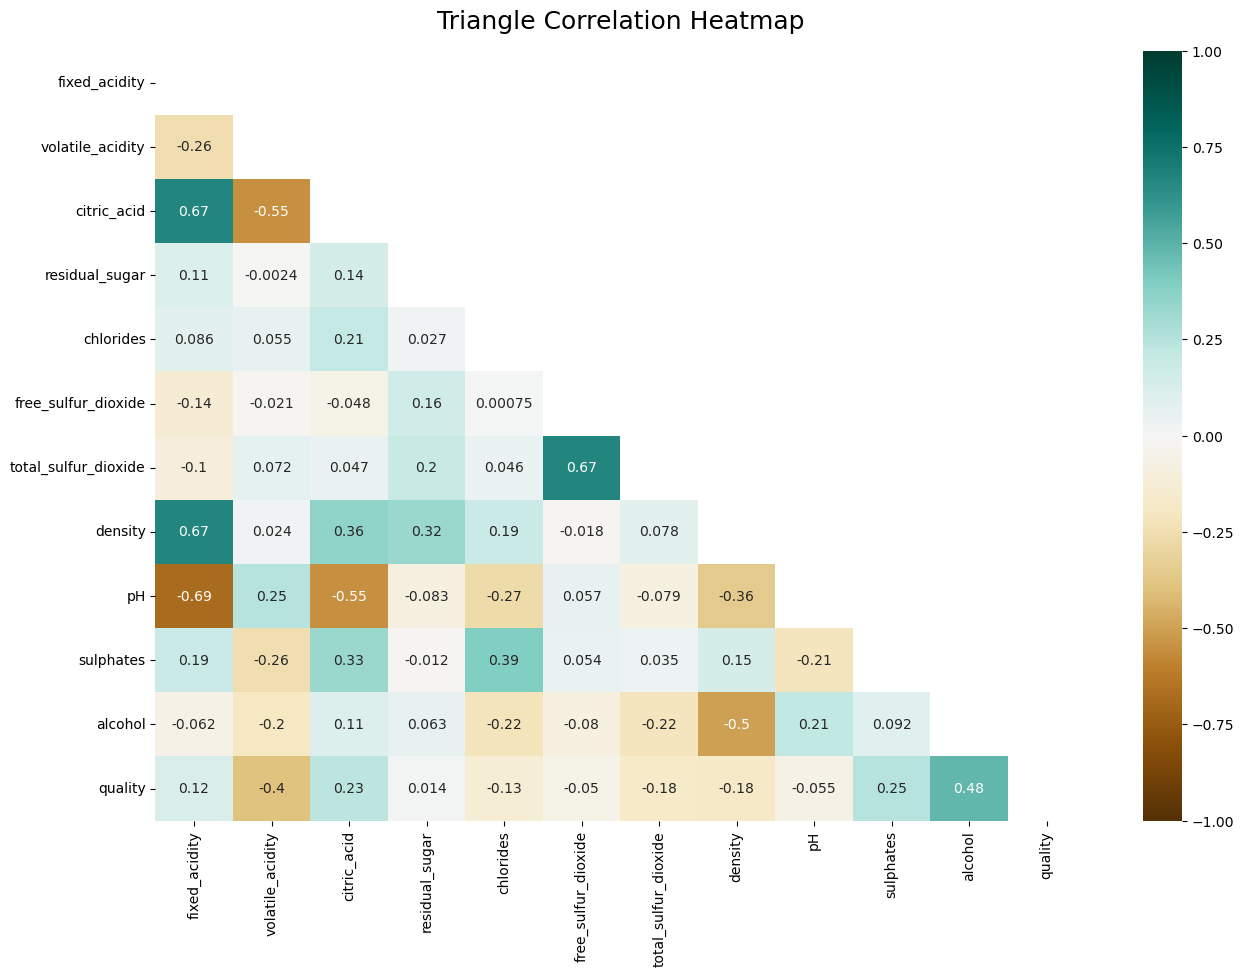

In [329]:
redwine.corr()
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(redwine.corr()))
heatmap = sns.heatmap(redwine.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);
plt.show()

As observed, pH and fixed as well as citric acid and volatile acidity are negatively corelated.\
But citric acid and fixed acidity are positively corelated.

In [330]:
redwine["Quality_Range"] = pd.cut(redwine["quality"], 
                                 bins=[-np.inf, 4, 6, np.inf], 
                                 labels=["3-4","5-6","7-8"])

Showing distribution of each component in the wine by the range of quality values using box plots.

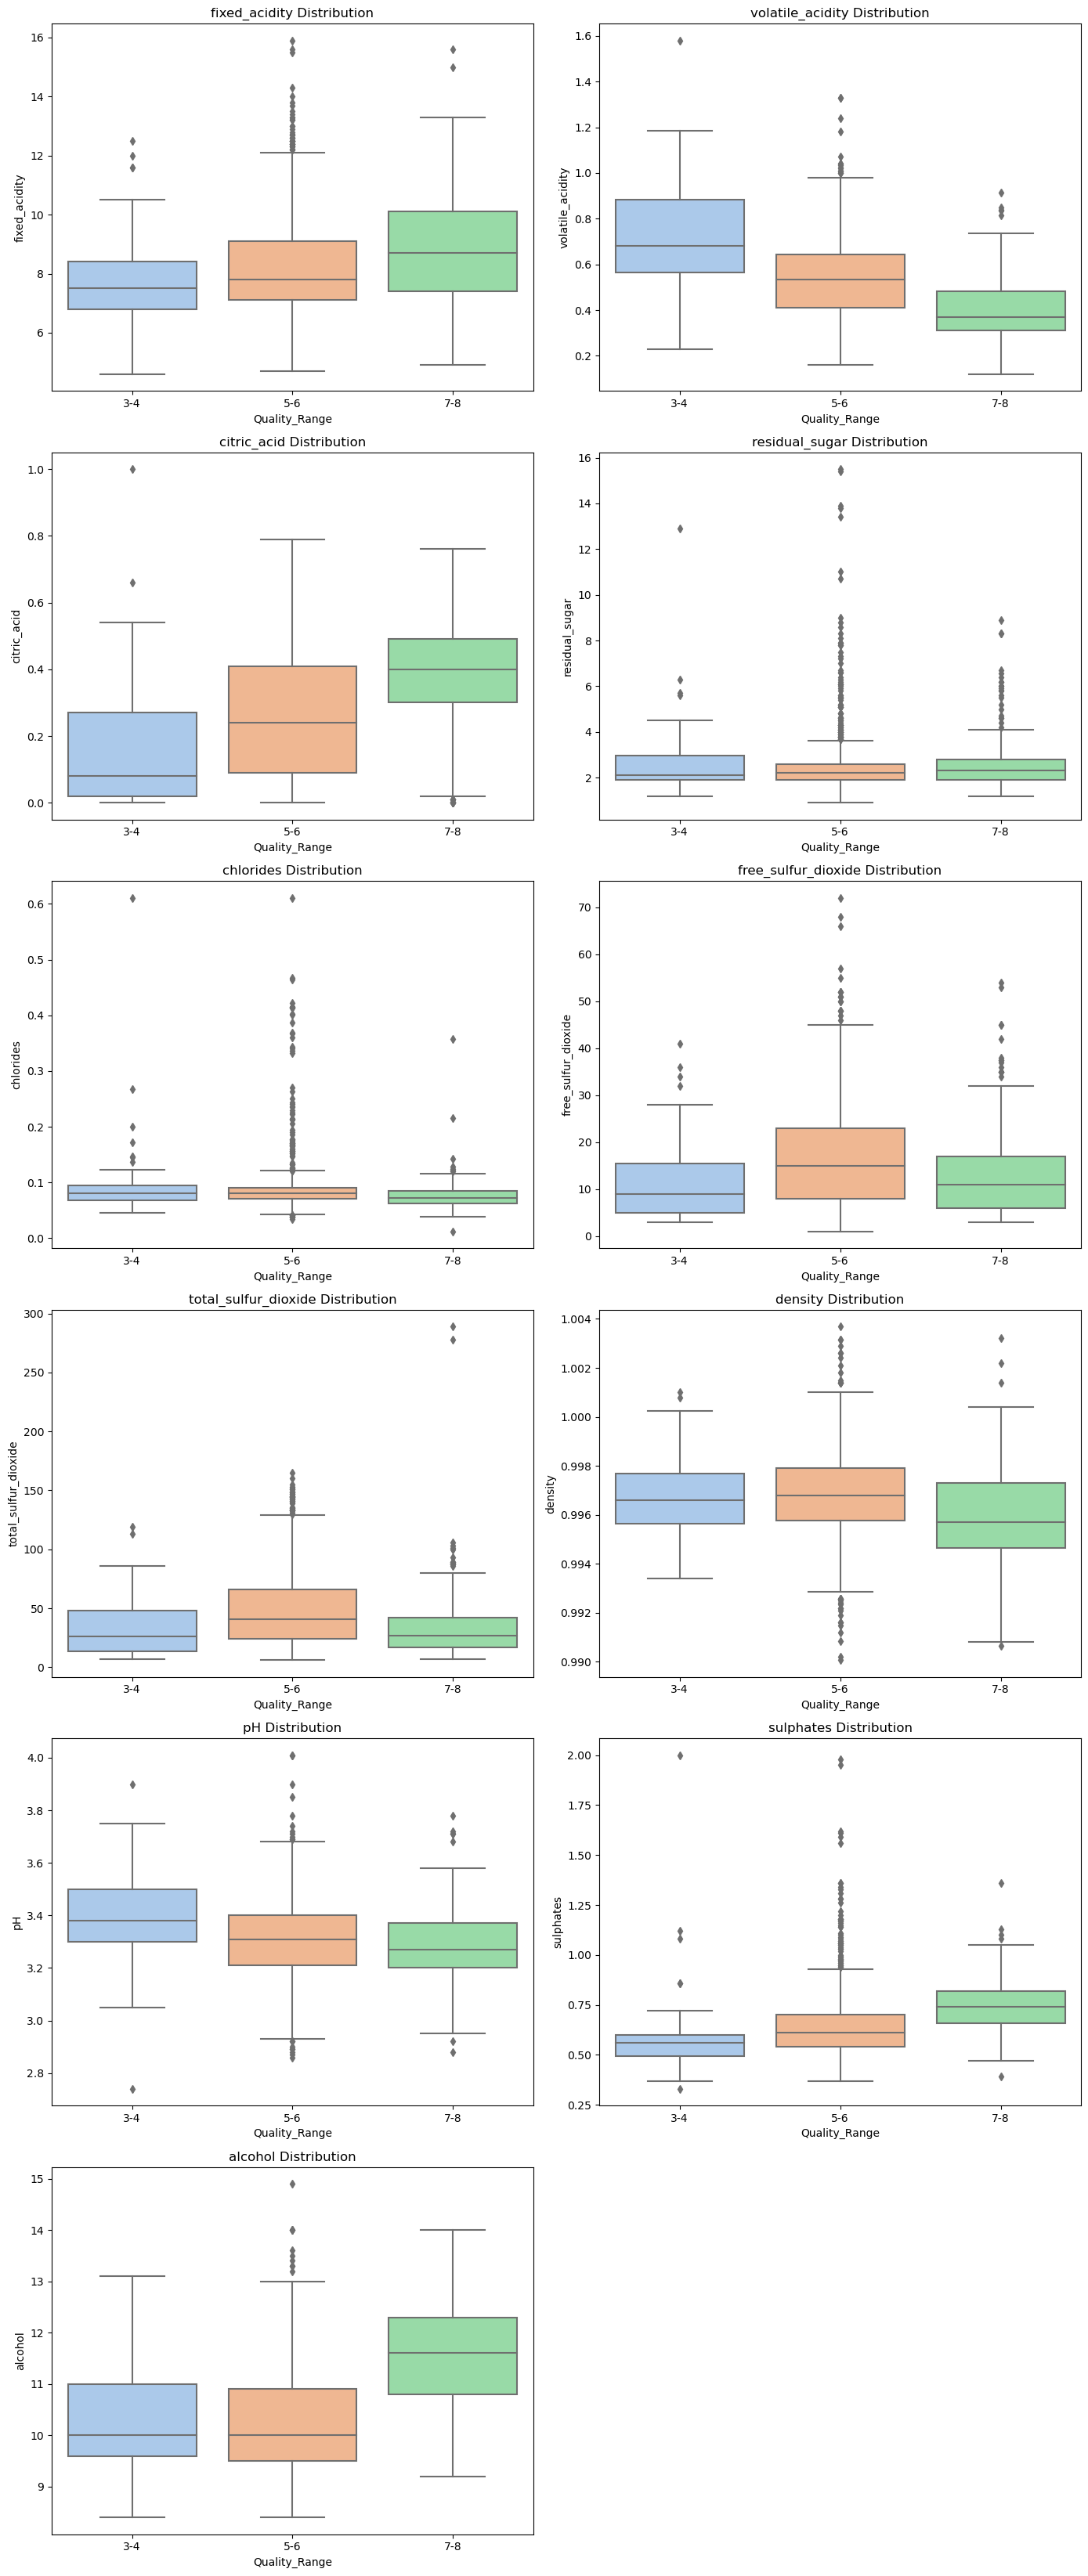

In [331]:
plt.figure(figsize=(14,len(num_cols)*3))
for idx,column in enumerate(num_cols):
    plt.subplot(len(num_cols)//2+1,2,idx+1)
    sns.boxplot(x="Quality_Range", y=column, data=redwine,palette="pastel")
    plt.title(f"{column} Distribution")
    plt.tight_layout()

In [332]:
redwine.drop("Quality_Range", axis=1, inplace=True)

# Feature Engineering

In [333]:
redwine.columns.tolist()

['fixed_acidity',
 'volatile_acidity',
 'citric_acid',
 'residual_sugar',
 'chlorides',
 'free_sulfur_dioxide',
 'total_sulfur_dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [334]:
def new_features(redwine):
    # 1. Acidity Ratios
    redwine['TotalAcidity'] = redwine['fixed_acidity'] + redwine['volatile_acidity'] + redwine['citric_acid']

    # 2. Free Sulfur Dioxide / Total Sulfur Dioxide Ratio
    redwine['FreeSulfurToTotalSulfurRatio'] = redwine['free_sulfur_dioxide'] / redwine['total_sulfur_dioxide']


    # 3. Alcohol Classes
    redwine['AlcoholClass'] = pd.cut(redwine['alcohol'], 
                                bins=[0, 10, 12, float('inf')], 
                                labels= ['Low', 'Medium', 'High'], 
                                include_lowest=True).map({"Low":0,"Medium":1,"High":2}).astype(int)

    # 4. pH and Acidity Ratio
    redwine['PHToAcidityRatio'] = redwine['pH'] / redwine['TotalAcidity']

new_features(redwine)

In [335]:
cat_cols = [col for col in redwine.columns if redwine[col].nunique()<6]
cat_cols

['AlcoholClass']

# Data Preparation

In [336]:
redwine = pd.get_dummies(redwine,columns=cat_cols, drop_first=True, dtype="int")

In [337]:
redwine.dtypes

fixed_acidity                   float64
volatile_acidity                float64
citric_acid                     float64
residual_sugar                  float64
chlorides                       float64
free_sulfur_dioxide             float64
total_sulfur_dioxide            float64
density                         float64
pH                              float64
sulphates                       float64
alcohol                         float64
quality                           int64
TotalAcidity                    float64
FreeSulfurToTotalSulfurRatio    float64
PHToAcidityRatio                float64
AlcoholClass_1                    int64
AlcoholClass_2                    int64
dtype: object

In [338]:
threshold = 5
# update the quality column to represent low(0) for quality <= 5 and high(1) otherwise
redwine['quality'] = (redwine['quality'] > threshold).astype(int)

In [339]:
redwine.quality.unique()

array([0, 1])

In [340]:
train_data, validation_data, test_data = np.split(redwine.sample(frac=1, random_state=1729), [int(0.7*len(redwine)), int(0.85*len(redwine))])

In [341]:
test_data.dtypes

fixed_acidity                   float64
volatile_acidity                float64
citric_acid                     float64
residual_sugar                  float64
chlorides                       float64
free_sulfur_dioxide             float64
total_sulfur_dioxide            float64
density                         float64
pH                              float64
sulphates                       float64
alcohol                         float64
quality                           int64
TotalAcidity                    float64
FreeSulfurToTotalSulfurRatio    float64
PHToAcidityRatio                float64
AlcoholClass_1                    int64
AlcoholClass_2                    int64
dtype: object

In [342]:
pd.concat([train_data['quality'], train_data.drop(['AlcoholClass_1', 'AlcoholClass_2','quality'], axis=1)], axis=1).to_csv('train.csv', index=False, header=False)
pd.concat([validation_data['quality'], validation_data.drop(['AlcoholClass_1', 'AlcoholClass_2','quality'], axis=1)], axis=1).to_csv('validation.csv', index=False, header=False)
pd.concat([test_data['quality'], test_data.drop(['AlcoholClass_1', 'AlcoholClass_2','quality'], axis=1)], axis=1).to_csv('test.csv', index=False, header=False)
pd.concat([test_data.drop(['AlcoholClass_1', 'AlcoholClass_2','quality'], axis=1)], axis=1).to_csv('test_features.csv', index=False, header=False)

In [343]:
train_data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'TotalAcidity',
       'FreeSulfurToTotalSulfurRatio', 'PHToAcidityRatio', 'AlcoholClass_1',
       'AlcoholClass_2'],
      dtype='object')

In [344]:
bucket = sagemaker.Session().default_bucket()
prefix = 'bda-sagemaker'
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'train/train.csv')).upload_file('train.csv')

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /root/.config/sagemaker/config.yaml


In [345]:
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'validation/validation.csv')).upload_file('validation.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test/test.csv')).upload_file('test.csv')
boto3.Session().resource('s3').Bucket(bucket).Object(os.path.join(prefix, 'test/test_features.csv')).upload_file('test_features.csv')

In [346]:
validation_data.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'TotalAcidity',
       'FreeSulfurToTotalSulfurRatio', 'PHToAcidityRatio', 'AlcoholClass_1',
       'AlcoholClass_2'],
      dtype='object')

# Training Model

## XGBoost Classifier

In [348]:
from sagemaker.session import Session
from sagemaker.inputs import TrainingInput

In [384]:
container = image_uris.retrieve('xgboost', region='us-east-1',version='latest')

INFO:sagemaker.image_uris:Ignoring unnecessary instance type: None.


In [385]:
s3_input_train = TrainingInput(s3_data='s3://{}/{}/train'.format(bucket, prefix), content_type='csv')
s3_input_validation = TrainingInput(s3_data='s3://{}/{}/validation'.format(bucket, prefix), content_type='csv')

In [386]:
xgb = Estimator(
    container,
    role,
    instance_count=1,
    instance_type='ml.m5.large',
    output_path='s3://{}/{}/xgb-op'.format(bucket, prefix),
    sagemaker_session=session
)
xgb.set_hyperparameters(
    max_depth=5,
    eta=0.2,
    gamma=4,
    min_child_weight=6,
    subsample=0.8,
    silent=0,
    objective='binary:logistic',
    num_round=100
)
xgb.fit({'train': s3_input_train, 'validation': s3_input_validation})

INFO:sagemaker:Creating training-job with name: xgboost-2023-11-30-23-05-41-824


2023-11-30 23:05:41 Starting - Starting the training job...
2023-11-30 23:05:56 Starting - Preparing the instances for training.......[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

In [387]:
xgb_predictor = xgb.deploy(initial_instance_count=1, instance_type='ml.m5.large')

INFO:sagemaker:Creating model with name: xgboost-2023-11-30-23-09-55-204
INFO:sagemaker:Creating endpoint-config with name xgboost-2023-11-30-23-09-55-204
INFO:sagemaker:Creating endpoint with name xgboost-2023-11-30-23-09-55-204


----!

In [388]:
from sagemaker.serializers import CSVSerializer
xgb_predictor.serializer = CSVSerializer()

In [389]:
def predict(data, rows=1500):
    split_array = np.array_split(data, int(data.shape[0]/float(rows)+1))
    predictions = ''
    for array in split_array:
        predictions = ','.join([predictions, xgb_predictor.predict(array).decode('utf-8')])
    return np.fromstring(predictions[1:], sep=',')

predictions = predict(test_data.drop(['AlcoholClass_1', 'AlcoholClass_2','quality'], axis=1).to_numpy())

In [390]:
pd.crosstab(index=test_data['quality'], columns=np.round(predictions), rownames=['actuals'],colnames=['predictions'])

predictions,0.0,1.0
actuals,,
0,71,27
1,30,76


In [391]:
# Predictions on Validation Set
y_val_pred = predict(validation_data.drop(['AlcoholClass_1', 'AlcoholClass_2','quality'], axis=1).to_numpy())

# Predictions on Test Set
y_test_pred = predict(test_data.drop(['AlcoholClass_1', 'AlcoholClass_2','quality'], axis=1).to_numpy())

In [392]:
from sklearn.metrics import accuracy_score

# Convert probabilities to class labels based on a threshol for binary classification
threshold = 0.5
y_val_pred_classes = (y_val_pred > threshold).astype(int)

val_accuracy = accuracy_score(validation_data['quality'].to_numpy(), y_val_pred_classes)

y_test_pred_classes = (y_test_pred > threshold).astype(int)

val_accuracy = accuracy_score(validation_data['quality'].to_numpy(), y_val_pred_classes)

test_accuracy = accuracy_score(test_data['quality'].to_numpy(), y_test_pred_classes)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Validation Accuracy: 0.7206
Test Accuracy: 0.7206


In [393]:
y_val = validation_data['quality'].to_numpy()
y_test = test_data['quality'].to_numpy()

In [394]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Validation Set Metrics
val_conf_matrix = confusion_matrix(y_val, y_val_pred_classes)
val_class_report = classification_report(y_val, y_val_pred_classes)
val_precision = precision_score(y_val, y_val_pred_classes, average='weighted')
val_recall = recall_score(y_val, y_val_pred_classes, average='weighted')
val_f1 = f1_score(y_val, y_val_pred_classes, average='weighted')

# Test Set Metrics
test_conf_matrix = confusion_matrix(y_test, y_test_pred_classes)
test_class_report = classification_report(y_test, y_test_pred_classes)
test_precision = precision_score(y_test, y_test_pred_classes, average='weighted')
test_recall = recall_score(y_test, y_test_pred_classes, average='weighted')
test_f1 = f1_score(y_test, y_test_pred_classes, average='weighted')

In [395]:
print("Validation confusion matrix : {}".format(val_conf_matrix))
print("Validation class report : {}".format(val_class_report))
print("Validation precision : {}".format(val_precision))
print("Validation recall : {}".format(val_recall))
print("Validation F1 score : {}".format(val_f1))
print("\n")
print("Test confusion matrix : {}".format(test_conf_matrix))
print("Test class report : {}".format(test_class_report))
print("Test precision : {}".format(test_precision))
print("Test recall : {}".format(test_recall))
print("Test F1 score : {}".format(test_f1))

Validation confusion matrix : [[64 30]
 [27 83]]
Validation class report :               precision    recall  f1-score   support

           0       0.70      0.68      0.69        94
           1       0.73      0.75      0.74       110

    accuracy                           0.72       204
   macro avg       0.72      0.72      0.72       204
weighted avg       0.72      0.72      0.72       204

Validation precision : 0.7201291680729474
Validation recall : 0.7205882352941176
Validation F1 score : 0.7202021858313075


Test confusion matrix : [[71 27]
 [30 76]]
Test class report :               precision    recall  f1-score   support

           0       0.70      0.72      0.71        98
           1       0.74      0.72      0.73       106

    accuracy                           0.72       204
   macro avg       0.72      0.72      0.72       204
weighted avg       0.72      0.72      0.72       204

Test precision : 0.7211013791270616
Test recall : 0.7205882352941176
Test F1 score :

## Hyperparameter tuning for XGBoost

In [ ]:
# hyperparameter ranges for tuning
hyperparameter_ranges = {
    'max_depth': IntegerParameter(3, 10),
    'eta': ContinuousParameter(0.05, 0.5),
    # Add more hyperparameters and their ranges
}

# Create a HyperparameterTuner
tuner = HyperparameterTuner(
    estimator=xgb,
    objective_metric_name='validation:auc',  # Choose an appropriate evaluation metric
    hyperparameter_ranges=hyperparameter_ranges,
    max_jobs=10,  # Number of tuning jobs to run
    max_parallel_jobs=2,  # Number of parallel tuning jobs
)

tuner.fit({'train': s3_input_train, 'validation': s3_input_validation})

best_estimator = tuner.best_estimator()

best_predictor = best_estimator.deploy(initial_instance_count=1, instance_type='ml.m5.large')

INFO:sagemaker:Creating hyperparameter tuning job with name: xgboost-231130-2351


.......................................................................................!

In [403]:
best_predictor.serializer = CSVSerializer()

In [404]:
def predict(data, rows=1500):
    split_array = np.array_split(data, int(data.shape[0]/float(rows)+1))
    predictions = ''
    for array in split_array:
        predictions = ','.join([predictions, best_predictor.predict(array).decode('utf-8')])
    return np.fromstring(predictions[1:], sep=',')

predictions = predict(test_data.drop(['AlcoholClass_1', 'AlcoholClass_2','quality'], axis=1).to_numpy())

In [405]:
pd.crosstab(index=test_data['quality'], columns=np.round(predictions), rownames=['actuals'],colnames=['predictions'])

predictions,0.0,1.0
actuals,,
0,64,34
1,26,80


In [406]:
# Predictions on Validation Set
y_val_pred = predict(validation_data.drop(['AlcoholClass_1', 'AlcoholClass_2','quality'], axis=1).to_numpy())

# Predictions on Test Set
y_test_pred = predict(test_data.drop(['AlcoholClass_1', 'AlcoholClass_2','quality'], axis=1).to_numpy())

In [407]:
from sklearn.metrics import accuracy_score

threshold = 0.5
y_val_pred_classes = (y_val_pred > threshold).astype(int)

val_accuracy = accuracy_score(validation_data['quality'].to_numpy(), y_val_pred_classes)

y_test_pred_classes = (y_test_pred > threshold).astype(int)

val_accuracy = accuracy_score(validation_data['quality'].to_numpy(), y_val_pred_classes)

test_accuracy = accuracy_score(test_data['quality'].to_numpy(), y_test_pred_classes)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Validation Accuracy: 0.7206
Test Accuracy: 0.7059


In [408]:
y_val = validation_data['quality'].to_numpy()
y_test = test_data['quality'].to_numpy()

In [409]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Validation Set Metrics
val_conf_matrix = confusion_matrix(y_val, y_val_pred_classes)
val_class_report = classification_report(y_val, y_val_pred_classes)
val_precision = precision_score(y_val, y_val_pred_classes, average='weighted')
val_recall = recall_score(y_val, y_val_pred_classes, average='weighted')
val_f1 = f1_score(y_val, y_val_pred_classes, average='weighted')

# Test Set Metrics
test_conf_matrix = confusion_matrix(y_test, y_test_pred_classes)
test_class_report = classification_report(y_test, y_test_pred_classes)
test_precision = precision_score(y_test, y_test_pred_classes, average='weighted')
test_recall = recall_score(y_test, y_test_pred_classes, average='weighted')
test_f1 = f1_score(y_test, y_test_pred_classes, average='weighted')

In [410]:
print("Validation confusion matrix : {}".format(val_conf_matrix))
print("Validation class report : {}".format(val_class_report))
print("Validation precision : {}".format(val_precision))
print("Validation recall : {}".format(val_recall))
print("Validation F1 score : {}".format(val_f1))
print("\n")
print("Test confusion matrix : {}".format(test_conf_matrix))
print("Test class report : {}".format(test_class_report))
print("Test precision : {}".format(test_precision))
print("Test recall : {}".format(test_recall))
print("Test F1 score : {}".format(test_f1))

Validation confusion matrix : [[65 29]
 [28 82]]
Validation class report :               precision    recall  f1-score   support

           0       0.70      0.69      0.70        94
           1       0.74      0.75      0.74       110

    accuracy                           0.72       204
   macro avg       0.72      0.72      0.72       204
weighted avg       0.72      0.72      0.72       204

Validation precision : 0.7203930685904121
Validation recall : 0.7205882352941176
Validation F1 score : 0.7204732983279696


Test confusion matrix : [[64 34]
 [26 80]]
Test class report :               precision    recall  f1-score   support

           0       0.71      0.65      0.68        98
           1       0.70      0.75      0.73       106

    accuracy                           0.71       204
   macro avg       0.71      0.70      0.70       204
weighted avg       0.71      0.71      0.70       204

Test precision : 0.7062492833390666
Test recall : 0.7058823529411765
Test F1 score :

In [411]:
xgb_predictor.delete_endpoint() # had already deleted the endpoint

INFO:sagemaker:Deleting endpoint configuration with name: xgboost-2023-11-30-23-09-55-204


ClientError: An error occurred (ValidationException) when calling the DeleteEndpointConfig operation: Could not find endpoint configuration "xgboost-2023-11-30-23-09-55-204".

In [412]:
best_predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: xgboost-2023-11-30-23-59-40-469
INFO:sagemaker:Deleting endpoint with name: xgboost-2023-11-30-23-59-40-469


## LightGBM classifier

In [363]:
redwine.dtypes

fixed_acidity                   float64
volatile_acidity                float64
citric_acid                     float64
residual_sugar                  float64
chlorides                       float64
free_sulfur_dioxide             float64
total_sulfur_dioxide            float64
density                         float64
pH                              float64
sulphates                       float64
alcohol                         float64
quality                           int64
TotalAcidity                    float64
FreeSulfurToTotalSulfurRatio    float64
PHToAcidityRatio                float64
AlcoholClass_1                    int64
AlcoholClass_2                    int64
dtype: object

In [364]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = redwine.drop(["quality","AlcoholClass_1","AlcoholClass_2"], axis=1)
y = redwine["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state = 42)

[LightGBM] [Info] Number of positive: 582, number of negative: 505
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1754
[LightGBM] [Info] Number of data points in the train set: 1087, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535419 -> initscore=0.141912
[LightGBM] [Info] Start training from score 0.141912


0.7573529411764706

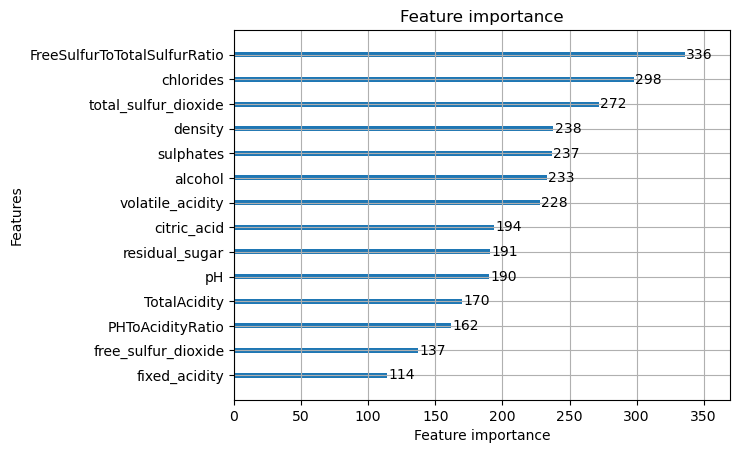

In [365]:
import lightgbm
lgb = lightgbm.LGBMClassifier()
lgb.fit(X_train, y_train)
lightgbm.plot_importance(lgb);
accuracy_score(y_test,lgb.predict(X_test))

In [366]:
# Predictions on Test Set
y_test_pred = lgb.predict(X_test)


In [367]:
y_test_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0])

In [368]:
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.7574


In [369]:
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted')
test_recall = recall_score(y_test, y_test_pred, average='weighted')
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

In [370]:
print("Test confusion matrix : {}".format(test_conf_matrix))
print("Test class report : {}".format(test_class_report))
print("Test precision : {}".format(test_precision))
print("Test recall : {}".format(test_recall))
print("Test F1 score : {}".format(test_f1))

Test confusion matrix : [[ 98  37]
 [ 29 108]]
Test class report :               precision    recall  f1-score   support

           0       0.77      0.73      0.75       135
           1       0.74      0.79      0.77       137

    accuracy                           0.76       272
   macro avg       0.76      0.76      0.76       272
weighted avg       0.76      0.76      0.76       272

Test precision : 0.7581419399147115
Test recall : 0.7573529411764706
Test F1 score : 0.7570902081800724


## Hyperparameter tuning for LightGBM model

In [377]:
from sklearn.model_selection import GridSearchCV

In [378]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
}


In [379]:
grid_search = GridSearchCV(estimator=lgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [380]:
grid_search.fit(X_train, y_train)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [381]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [382]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
test_conf_matrix = confusion_matrix(y_test, y_pred)
test_class_report = classification_report(y_test, y_pred)
test_precision = precision_score(y_test, y_pred, average='weighted')
test_recall = recall_score(y_test, y_pred, average='weighted')
test_f1 = f1_score(y_test, y_pred, average='weighted')

print("Test confusion matrix : {}".format(test_conf_matrix))
print("Test class report : {}".format(test_class_report))
print("Test precision : {}".format(test_precision))
print("Test recall : {}".format(test_recall))
print("Test F1 score : {}".format(test_f1))

[LightGBM] [Info] Number of positive: 582, number of negative: 505
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1754
[LightGBM] [Info] Number of data points in the train set: 1087, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.535419 -> initscore=0.141912
[LightGBM] [Info] Start training from score 0.141912
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

## Comparing both models

As we can observe that the accuracy for the LightGBM model is higher (\~76%) than that for XGBoost model(\~72%) for thw wine-quality dataset even after hyper parameter tuning. Along with this, other factors like confusion matrix, precision and F1 score show better results for the LightGBM model that the XGBoost model.\
Hence we can conclude that the LightGBM model is more appropriate for the wine-quality data.